In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


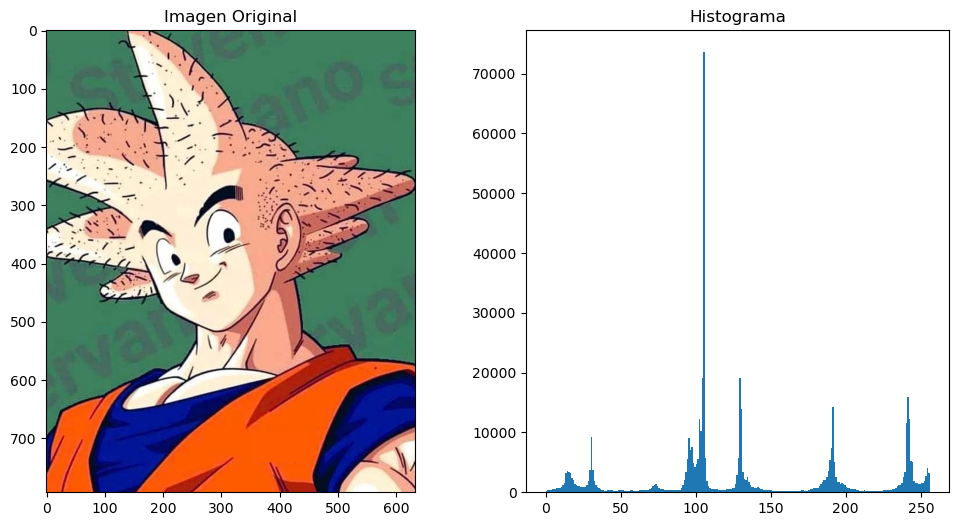

In [2]:
# Cargar imagen y convertir a escala de grises
img = cv2.imread('input.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32)  # Usar flotantes para operaciones matriciales

# Mostrar imagen original y histograma
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Imagen Original')
plt.subplot(122), plt.hist(gray.ravel(), 256, [0,256]), plt.title('Histograma')
plt.show()

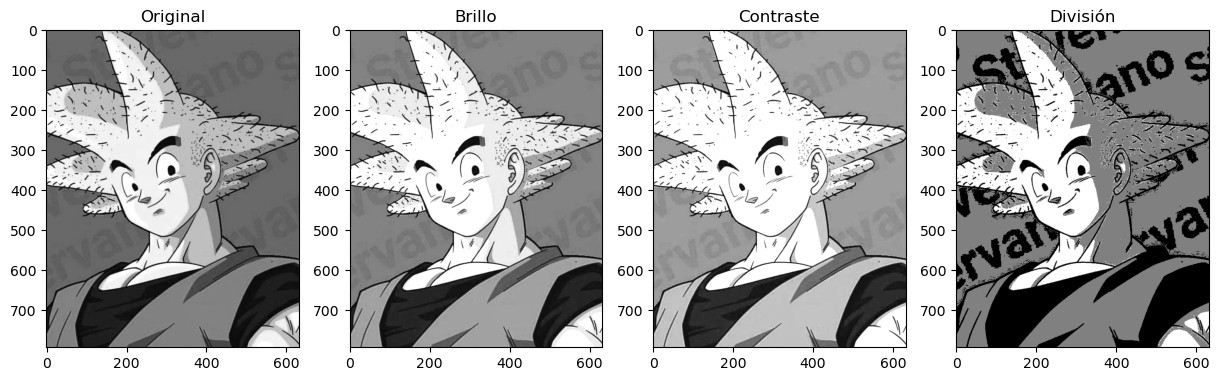

In [3]:

# ---------------------
# 1. Operaciones Aritméticas
# ---------------------
# Definir operaciones como operaciones matriciales:
# - Brillo: h(m,n) = f(m,n) + B
# - Contraste: h(m,n) = f(m,n) * C
# - Ejemplo adicional: División (usando una máscara)
mask = np.ones_like(gray) * 100  # Máscara para ilustrar división

brightness = 50
contrast = 1.5

# Brillo
brightened = np.clip(gray + brightness, 0, 255).astype(np.uint8)

# Contraste
contrasted = np.clip(gray * contrast, 0, 255).astype(np.uint8)

# División (ejemplo adicional)
divided = np.clip(gray / mask, 0, 255).astype(np.uint8)

plt.figure(figsize=(15,5))
plt.subplot(141), plt.imshow(gray, cmap='gray'), plt.title('Original')
plt.subplot(142), plt.imshow(brightened, cmap='gray'), plt.title('Brillo')
plt.subplot(143), plt.imshow(contrasted, cmap='gray'), plt.title('Contraste')
plt.subplot(144), plt.imshow(divided, cmap='gray'), plt.title('División')
plt.show()


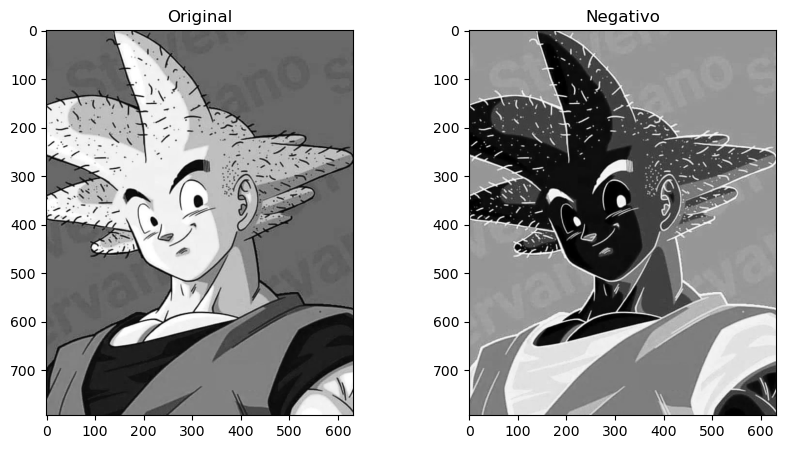

In [4]:
# 2. Imagen Negativa
# ---------------------
# h(m,n) = 255 - f(m,n)
negative = 255 - gray
negative = np.clip(negative, 0, 255).astype(np.uint8)

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(gray, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(negative, cmap='gray'), plt.title('Negativo')
plt.show()


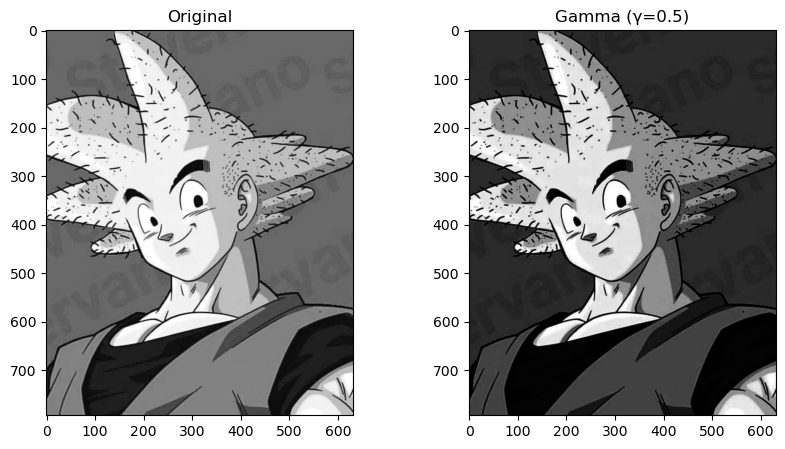

In [5]:


# 3. Corrección Gamma
# h(m,n) = 255 * (f(m,n)/255)^{1/γ}
def gamma_correction(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    return (image / 255.0)**inv_gamma * 255.0

gamma = 0.5
gamma_corrected = gamma_correction(gray, gamma).astype(np.uint8)

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(gray, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(gamma_corrected, cmap='gray'), plt.title('Gamma (γ=0.5)')
plt.show()



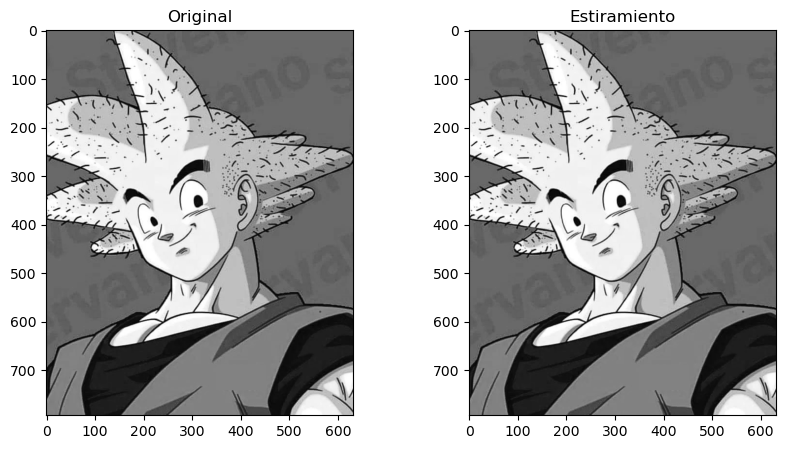

In [6]:
# 4. Estiramiento de Histograma
# h(m,n) = (f(m,n) - min_f) * (255/(max_f - min_f))
min_val = gray.min()
max_val = gray.max()
stretched = ((gray - min_val) * (255/(max_val - min_val))).astype(np.uint8)

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(gray, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(stretched, cmap='gray'), plt.title('Estiramiento')
plt.show()


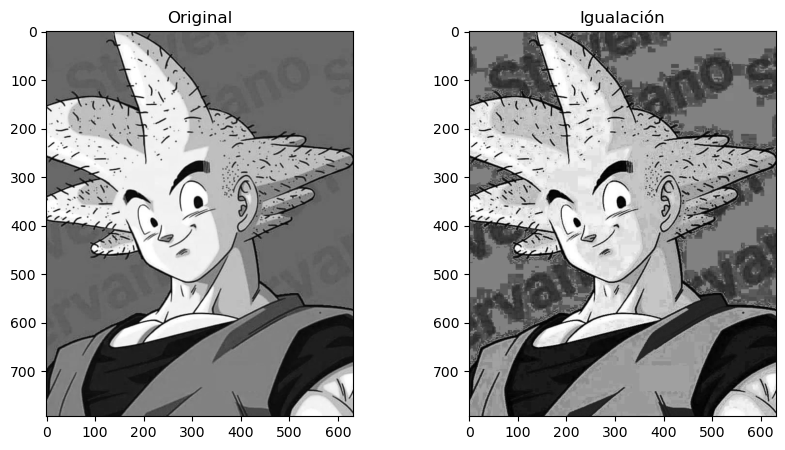

In [7]:
# 5. Igualación de Histograma
# h(m,n) = T(r_k) donde T(r) = (L-1) * S(r)
# (Usamos OpenCV para implementar esta compleja operación)
equalized = cv2.equalizeHist(gray.astype(np.uint8))

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(gray, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(equalized, cmap='gray'), plt.title('Igualación')
plt.show()


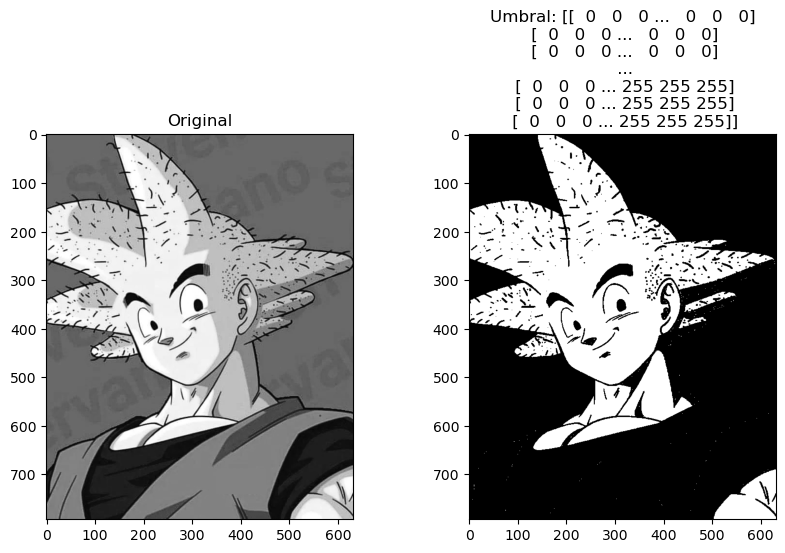

In [8]:
# 6. Umbralización
# ---------------------
# h(m,n) = { 0 si f(m,n) < T; 255 si f(m,n) >= T }
# Usando método Otsu para T automático
_, thresh = cv2.threshold(gray.astype(np.uint8), 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(gray, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(thresh, cmap='gray'), plt.title(f'Umbral: {thresh}')
plt.show()